In [1]:
import pandas as pd

In [2]:
!ls -alh data/

total 57M
drwxrwxrwx 1 root root 4.0K  3月  7 22:59 .
drwxrwxrwx 1 root root 4.0K  3月 13 22:50 ..
drwxrwxrwx 1 root root 4.0K  3月  7 22:17 example_test_files
drwxrwxrwx 1 root root    0  3月  7 22:59 .ipynb_checkpoints
-rwxrwxrwx 1 root root 3.7K  2月 22 23:58 public_timeseries_testing_util.py
-rwxrwxrwx 1 root root  75K  2月 22 23:58 supplemental_clinical_data.csv
-rwxrwxrwx 1 root root  73K  2月 22 23:58 train_clinical_data.csv
-rwxrwxrwx 1 root root  49M  2月 22 23:58 train_peptides.csv
-rwxrwxrwx 1 root root 7.4M  2月 22 23:58 train_proteins.csv


In [3]:
!ls -alh data/example_test_files/

total 140K
drwxrwxrwx 1 root root 4.0K  3月  7 22:17 .
drwxrwxrwx 1 root root 4.0K  3月  7 22:59 ..
-rwxrwxrwx 1 root root 2.2K  2月 22 23:58 sample_submission.csv
-rwxrwxrwx 1 root root  708  2月 22 23:58 test.csv
-rwxrwxrwx 1 root root 106K  2月 22 23:58 test_peptides.csv
-rwxrwxrwx 1 root root  15K  2月 22 23:58 test_proteins.csv


In [4]:
# train files
train_clinical = './data/train_clinical_data.csv'
train_petides = './data/train_peptides.csv'
train_proteins = './data/train_proteins.csv'

# test files
test_clinical = './data/example_test_files/test.csv'
test_petides = './data/example_test_files/test_peptides.csv'
test_proteins = './data/example_test_files/test_proteins.csv'

# supplement clinic data
sup_clinic = './data/supplemental_clinical_data.csv'

# submission file
submission = 'data/example_test_files/sample_submission.csv'

In [5]:
# loading files
train_clinical_df = pd.read_csv(train_clinical)
train_petides_df = pd.read_csv(train_petides)
train_proteins_df = pd.read_csv(train_proteins)

test_clinical_df = pd.read_csv(test_clinical)
test_petides_df = pd.read_csv(test_petides)
test_proteins_df = pd.read_csv(test_proteins)

sup_clinical_df = pd.read_csv(sup_clinic)

sample_submission = pd.read_csv(submission)

### Train and test clinicals
- visit_id - ID code for the visit.
- visit_month - The month of the visit, relative to the first visit by the patient.
- patient_id - An ID code for the patient.
- updrs_[1-4] - The patient's score for part N of the Unified Parkinson's Disease Rating Scale. Higher numbers indicate more severe symptoms. Each sub-section covers a distinct category of symptoms, such as mood and behavior for Part 1 and motor functions for Part 3.
- upd23b_clinical_state_on_medication - Whether or not the patient was taking medication such as Levodopa during the UPDRS assessment. Expected to mainly affect the scores for Part 3 (motor function). These medications wear off fairly quickly (on the order of one day) so it's common for patients to take the motor function exam twice in a single month, both with and without medication.
- updrs_1 to updrs_4 should be our target value y which need to be predicted

In [6]:
train_clinical_df.head(3)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN


In [7]:
train_clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [8]:
train_clinical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2615.0,32651.743786,18535.758700,55.0,16574.0,29417.0,50611.0,65043.0
visit_month,2615.0,31.190822,25.199053,0.0,10.5,24.0,48.0,108.0
updrs_1,2614.0,7.110559,5.525955,0.0,3.0,6.0,10.0,33.0
updrs_2,2613.0,6.743590,6.323230,0.0,1.0,5.0,10.0,40.0
updrs_3,2590.0,19.421236,15.000289,0.0,6.0,19.0,29.0,86.0
updrs_4,1577.0,1.861763,3.022112,0.0,0.0,0.0,3.0,20.0


In [12]:
train_clinical_df[train_clinical_df.upd23b_clinical_state_on_medication == 'On'].describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,775.0,33091.811613,18440.507348,55.0,16672.0,30951.0,49995.0,65043.0
visit_month,775.0,34.254194,21.845266,0.0,18.0,30.0,48.0,108.0
updrs_1,775.0,9.734194,5.990868,0.0,5.0,9.0,13.0,31.0
updrs_2,775.0,9.563871,6.322368,0.0,5.0,8.0,13.0,40.0
updrs_3,767.0,24.368970,13.122469,1.0,15.0,22.0,31.0,86.0
updrs_4,760.0,2.450000,3.513216,0.0,0.0,0.0,4.0,20.0


In [13]:
train_clinical_df[train_clinical_df.upd23b_clinical_state_on_medication == 'Off'].describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,513.0,34784.744639,18728.992051,942.0,18183.0,35465.0,52266.0,65043.0
visit_month,513.0,46.555556,23.862671,0.0,30.0,48.0,60.0,108.0
updrs_1,513.0,8.758285,5.473307,0.0,5.0,8.0,12.0,31.0
updrs_2,513.0,10.037037,5.894962,0.0,6.0,9.0,14.0,28.0
updrs_3,513.0,30.871345,12.229216,1.0,22.0,30.0,38.0,78.0
updrs_4,506.0,1.986166,2.690248,0.0,0.0,0.0,4.0,13.0


In [14]:
test_clinical_df.head(3)

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0


In [15]:
test_clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   visit_id     16 non-null     object
 1   visit_month  16 non-null     int64 
 2   patient_id   16 non-null     int64 
 3   updrs_test   16 non-null     object
 4   row_id       16 non-null     object
 5   group_key    16 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [16]:
test_clinical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
visit_month,16.0,3.0,3.098387,0.0,0.0,3.0,6.0,6.0
patient_id,16.0,26882.5,24312.523856,3342.0,3342.0,26882.5,50423.0,50423.0
group_key,16.0,3.0,3.098387,0.0,0.0,3.0,6.0,6.0


### Train and test peptides
- visit_id - ID code for the visit.
- visit_month - The month of the visit, relative to the first visit by the patient.
- patient_id - An ID code for the patient.
- UniProt - The UniProt ID code for the associated protein. There are often several peptides per protein.
- Peptide - The sequence of amino acids included in the peptide. See this table for the relevant codes. Some rare annotations may not be included in the table. The test set may include peptides not found in the train set.
- PeptideAbundance - The frequency of the amino acid in the sample.

In [17]:
train_petides_df.head(3)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0


In [18]:
train_petides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [19]:
%%time
# aggreate by visit id, visit month, patient_id
train_petides_agg = train_petides_df.groupby(['visit_id'])['Peptide','PeptideAbundance'].agg(list).reset_index()

# convert rows into columns - column name is the peptides name and value is peptide abundance
train_petides_agg_col = pd.DataFrame()
for vid, peptides, peptideAbundance in zip(train_petides_agg['visit_id'], train_petides_agg['Peptide'], train_petides_agg['PeptideAbundance']):
    data = {k:[v] for k,v in zip(peptides, peptideAbundance)}
    data['visit_id'] = vid
    train_petides_agg_col = pd.concat([train_petides_agg_col, pd.DataFrame(data=data)])

<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


CPU times: user 29.6 s, sys: 0 ns, total: 29.6 s
Wall time: 29.6 s


In [20]:
train_petides_agg_col

,NEQEQPLGQWHLS,GNPEPTFSWTK,IEIPSSVQQVPTIIK,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,SMEQNGPGLEYR,VIAVNEVGR,VMTPAVYAPYDVK,VNGSPVDNHPFAGDVVFPR,LFGGNFAHQASVAR,VTEPISAESGEQVER,...,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,VSEADIQR,NSWGEEWGMGGYVK,SSNTYTLTDVRR,EPQVYTLPPSRDELTK
0,9104.27,60615.1,134795.0,24299.0,17715.2,79119.1,53294.9,32483.1,7150.57,2497.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10464.20,69318.8,171397.0,20462.6,15614.2,20647.9,99466.8,38678.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13235.70,85129.6,135717.0,21854.4,24246.1,99758.3,98788.3,41892.1,NaN,2372.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,12600.20,71619.8,114132.0,17616.5,20517.5,98198.3,109087.0,41552.2,16598.10,6015.90,...,14647.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,12003.20,92180.5,130398.0,27983.8,18453.9,66186.7,125747.0,47139.4,20475.10,2665.15,...,17061.10,295411.0,5079.40,4357.74,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9983.00,53629.2,98166.7,26308.1,21429.3,90784.8,50141.3,37894.3,12477.20,6303.17,...,6859.82,239494.0,NaN,3523.22,18099.3,29919.6,NaN,14100.30,6327.89,NaN
0,6757.32,50137.1,94688.6,15849.4,16954.8,64185.8,82081.2,26768.3,13208.70,1722.77,...,13415.70,NaN,5965.78,5037.46,13103.8,NaN,NaN,7600.02,8128.11,551866.0
0,NaN,41053.8,111577.0,15029.4,18044.4,52868.6,74998.1,28468.9,11422.80,1487.91,...,11344.40,NaN,5591.78,4934.15,15199.7,57934.3,4758.23,NaN,NaN,464023.0
0,11627.80,33102.9,72991.6,14181.8,11533.5,54769.6,30845.1,24697.4,16035.40,2117.43,...,19169.80,NaN,5301.83,4370.57,16274.6,64944.1,4936.86,5182.34,NaN,559269.0


In [21]:
train_petides_agg_col.describe().T

,count,mean,std,min,25%,50%,75%,max
NEQEQPLGQWHLS,764.0,11641.264435,2817.003530,873.778,9736.8575,11546.400,13383.025,21361.8
GNPEPTFSWTK,1030.0,76367.164728,32366.189011,2645.190,53702.4750,72213.950,93190.725,235837.0
IEIPSSVQQVPTIIK,1048.0,145751.527996,64302.859680,7491.210,101410.7500,138427.000,179827.000,508443.0
KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,1066.0,25062.222917,11221.845903,1539.320,17244.0000,23616.200,31317.575,79002.3
SMEQNGPGLEYR,1094.0,24059.520484,11002.026192,4128.580,16148.9500,22063.850,30091.450,89741.9
...,...,...,...,...,...,...,...,...
PALEDLR,796.0,41121.736520,14776.022580,1159.250,32039.6250,40081.500,50217.150,99763.7
VSEADIQR,715.0,5691.205552,2097.631192,1038.220,4258.0700,5418.350,6877.790,15319.2
NSWGEEWGMGGYVK,786.0,8805.399151,3135.091774,713.833,6768.0100,8437.385,10477.925,27250.9
SSNTYTLTDVRR,669.0,9596.540523,3351.118083,760.640,7289.7800,9325.780,11401.300,21832.8


In [22]:
train_petides_agg_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 0
Columns: 969 entries, NEQEQPLGQWHLS to EPQVYTLPPSRDELTK
dtypes: float64(968), object(1)
memory usage: 8.2+ MB


In [19]:
test_petides_df.head(3)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.3,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.6,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.4,0


In [20]:
test_petides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   visit_id          2057 non-null   object 
 1   visit_month       2057 non-null   int64  
 2   patient_id        2057 non-null   int64  
 3   UniProt           2057 non-null   object 
 4   Peptide           2057 non-null   object 
 5   PeptideAbundance  2057 non-null   float64
 6   group_key         2057 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 112.6+ KB


In [21]:
test_petides_df.describe().T

,count,mean,std,min,25%,50%,75%,max
visit_month,2057.0,3.021877,3.000650e+00,0.000,0.0,6.0,6.0,6.0
patient_id,2057.0,26710.838600,2.354560e+04,3342.000,3342.0,3342.0,50423.0,50423.0
PeptideAbundance,2057.0,652506.996858,3.137186e+06,886.086,26366.9,72914.3,208404.0,55622600.0
group_key,2057.0,3.021877,3.000650e+00,0.000,0.0,6.0,6.0,6.0


### Train and test protein
- visit_id - ID code for the visit.
- visit_month - The month of the visit, relative to the first visit by the patient.
- patient_id - An ID code for the patient.
- UniProt - The UniProt ID code for the associated protein. There are often several peptides per protein. The test set may include proteins not found in the train set.
- NPX - Normalized protein expression. The frequency of the protein's occurrence in the sample. May not have a 1:1 relationship with the component peptides as some proteins contain repeated copies of a given peptide.

In [29]:
train_proteins_df.head(3)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8


In [30]:
train_proteins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [31]:
%%time
# aggreate by visit id, visit month, patient_id
train_proteins_agg = train_proteins_df.groupby(['visit_id'])['UniProt','NPX'].agg(list).reset_index()

# convert rows into columns - column name is the peptides name and value is peptide abundance
train_proteins_agg_col = pd.DataFrame()
for vid, UniProt, NPX in zip(train_proteins_agg['visit_id'], train_proteins_agg['UniProt'], train_proteins_agg['NPX']):
    data = {k:[v] for k,v in zip(UniProt, NPX)}
    data['visit_id'] = vid
    train_proteins_agg_col = pd.concat([train_proteins_agg_col, pd.DataFrame(data=data)])

<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


CPU times: user 5.46 s, sys: 0 ns, total: 5.46 s
Wall time: 5.45 s


In [32]:
train_proteins_agg_col.head()

,O00391,O00533,O14773,O14791,O15240,O15394,O43505,O60888,O75144,O94919,...,P13611,P14174,P17936,Q02818,Q13740,Q8N2S1,Q96BZ4,Q99969,Q9UBR2,P05408
0,9104.27,402321.0,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,53069.5,11074.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10464.20,435586.0,NaN,NaN,197117.0,15099.1,164268.0,108114.0,55856.4,44516.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,13235.70,507386.0,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,74672.3,57117.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,12600.20,494581.0,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,62369.7,29401.2,...,15341.3,21099.4,8035.38,17656.4,17489.3,8540.88,6910.25,15782.50,14647.9,NaN
0,12003.20,522138.0,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,70809.0,49287.0,...,19533.0,26039.6,7435.46,19644.6,NaN,4565.58,11675.50,8183.98,17061.1,NaN


In [33]:
train_proteins_agg_col.describe().T

,count,mean,std,min,25%,50%,75%,max
O00391,764.0,11641.264435,2817.003530,873.778,9736.8575,11546.40,13383.0250,21361.80
O00533,1112.0,511164.883903,235735.664694,59718.200,349059.0000,483442.50,648557.2500,1806980.00
O14773,1047.0,17688.295406,7166.325369,2811.120,12920.0500,17399.60,22077.0500,49695.60
O14791,942.0,3004.990691,1142.159575,336.517,2189.0875,2865.46,3593.1475,9352.64
O15240,1113.0,126151.780054,72748.393517,10717.400,70560.6000,116900.00,164947.0000,538862.00
...,...,...,...,...,...,...,...,...
Q8N2S1,1003.0,6698.831416,2046.662395,1278.020,5302.2750,6620.99,7976.7050,13663.60
Q96BZ4,765.0,9237.167843,3684.970624,1752.090,6623.9800,8869.40,11507.8000,23663.20
Q99969,999.0,12814.721972,4241.319185,641.390,9927.0000,12330.50,15259.5000,32915.50
Q9UBR2,972.0,15228.332809,4564.470310,4469.080,12071.4500,15003.95,18045.7000,39060.60


In [34]:
train_proteins_agg_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 0
Columns: 228 entries, O00391 to P05408
dtypes: float64(227), object(1)
memory usage: 1.9+ MB


In [35]:
test_proteins_df.head(3)

,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.9,0
1,50423_0,0,50423,O00533,490742.0,0
2,50423_0,0,50423,O00584,43615.3,0


In [36]:
test_proteins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visit_id     453 non-null    object 
 1   visit_month  453 non-null    int64  
 2   patient_id   453 non-null    int64  
 3   UniProt      453 non-null    object 
 4   NPX          453 non-null    float64
 5   group_key    453 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 21.4+ KB


In [37]:
test_proteins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
visit_month,453.0,2.993377e+00,3.003309e+00,0.00,0.0,0.0,6.0,6.0
patient_id,453.0,2.693447e+04,2.356647e+04,3342.00,3342.0,50423.0,50423.0,50423.0
NPX,453.0,2.962930e+06,2.533508e+07,2287.04,29478.8,115378.0,530162.0,439208000.0
group_key,453.0,2.993377e+00,3.003309e+00,0.00,0.0,0.0,6.0,6.0


### Sample submission
- For each patient need to predict 0,6,12,24 months' updrs score from 1 to 4

In [38]:
sample_submission = pd.read_csv('data/example_test_files/sample_submission.csv')
sample_submission

,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0
...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6
60,50423_6_updrs_4_plus_0_months,0,6
61,50423_6_updrs_4_plus_6_months,0,6
62,50423_6_updrs_4_plus_12_months,0,6


In [39]:
# 16 predictions for each customer, number of visit * number of scores = 4 * 4 = 16
sample_submission[sample_submission.prediction_id.str.startswith('3342')]

,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0
5,3342_0_updrs_2_plus_6_months,0,0
6,3342_0_updrs_2_plus_12_months,0,0
7,3342_0_updrs_2_plus_24_months,0,0
8,3342_0_updrs_3_plus_0_months,0,0
9,3342_0_updrs_3_plus_6_months,0,0


In [40]:
# merge data
# merge clinical with protein
train = pd.merge(train_clinical_df, train_proteins_agg_col, on=['visit_id'], how='left')
# merge with peptides
train = pd.merge(train, train_petides_agg_col, on=['visit_id'], how='left')

train.head(3)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,VSEADIQR,NSWGEEWGMGGYVK,SSNTYTLTDVRR,EPQVYTLPPSRDELTK
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,23122.5,283103.0,10698.4,11808.5,27229.3,NaN,8667.28,8833.09,13929.2,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,23499.8,89583.1,NaN,10336.0,23305.4,50231.1,7170.32,9106.86,15427.3,NaN


In [41]:
train.tail(3)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,VSEADIQR,NSWGEEWGMGGYVK,SSNTYTLTDVRR,EPQVYTLPPSRDELTK
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,65043_84,65043,84,7.0,9.0,20.0,3.0,Off,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2614
Columns: 1203 entries, visit_id to EPQVYTLPPSRDELTK
dtypes: float64(1199), int64(2), object(2)
memory usage: 24.0+ MB


In [43]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2615.0,32651.743786,18535.758700,55.000,16574.000,29417.00,50611.00,65043.0
visit_month,2615.0,31.190822,25.199053,0.000,10.500,24.00,48.00,108.0
updrs_1,2614.0,7.110559,5.525955,0.000,3.000,6.00,10.00,33.0
updrs_2,2613.0,6.743590,6.323230,0.000,1.000,5.00,10.00,40.0
updrs_3,2590.0,19.421236,15.000289,0.000,6.000,19.00,29.00,86.0
...,...,...,...,...,...,...,...,...
PALEDLR,759.0,41233.447365,14856.292163,1159.250,32020.750,40068.00,50267.30,99763.7
VSEADIQR,681.0,5667.175419,2042.488930,1038.220,4261.850,5433.50,6865.96,13765.6
NSWGEEWGMGGYVK,752.0,8787.151121,3152.127683,713.833,6747.490,8423.62,10468.55,27250.9
SSNTYTLTDVRR,639.0,9596.400642,3332.875606,1564.020,7279.075,9325.78,11413.15,21832.8


In [44]:
corr = train.corr(numeric_only=True).reset_index()
corr.head()

,index,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O14773,...,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,VSEADIQR,NSWGEEWGMGGYVK,SSNTYTLTDVRR,EPQVYTLPPSRDELTK
0,patient_id,1.000000,-0.019781,0.048258,0.037762,0.047173,-0.009203,0.024052,0.010694,0.006169,...,-0.004352,0.077089,-0.008861,-0.001764,0.116505,0.011222,0.033387,-0.012198,-0.037413,0.012032
1,visit_month,-0.019781,1.000000,0.121625,0.132308,0.135300,0.138013,-0.009919,-0.019520,-0.030096,...,-0.012148,0.017659,-0.002528,-0.061305,0.025746,0.008078,-0.037774,0.025478,-0.044275,-0.043525
2,updrs_1,0.048258,0.121625,1.000000,0.661802,0.434569,0.432620,-0.065707,-0.145430,-0.029729,...,-0.073662,-0.047472,-0.104145,0.025155,-0.027457,0.044281,-0.071762,-0.033052,0.038591,0.011918
3,updrs_2,0.037762,0.132308,0.661802,1.000000,0.735106,0.383866,-0.130126,-0.182777,-0.107182,...,-0.074569,-0.116326,-0.071992,0.015428,-0.027051,0.021297,-0.124826,-0.120558,-0.055156,0.057501
4,updrs_3,0.047173,0.135300,0.434569,0.735106,1.000000,0.221593,-0.100570,-0.222496,-0.060787,...,-0.042039,-0.087710,-0.021500,0.013431,-0.004686,-0.000162,-0.119334,-0.117143,-0.066934,0.087159


In [45]:
# corr[['index','updrs_1', 'updrs_2','updrs_3','updrs_4']].style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '10px'})

<AxesSubplot: title={'center': 'overall score trend'}, xlabel='visit_month'>

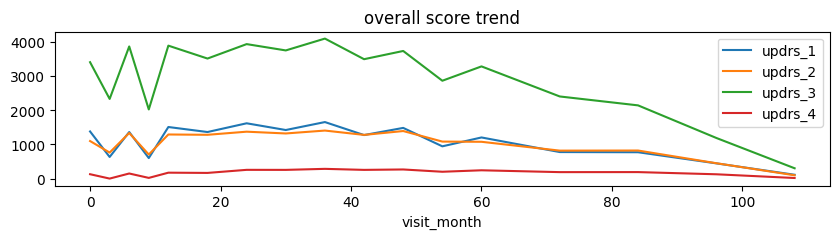

In [59]:
train[['visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].fillna(0).groupby('visit_month').sum().plot.line(figsize=(10, 2), title=f'overall score trend')

<AxesSubplot: title={'center': 'overall score trend'}, xlabel='visit_month'>

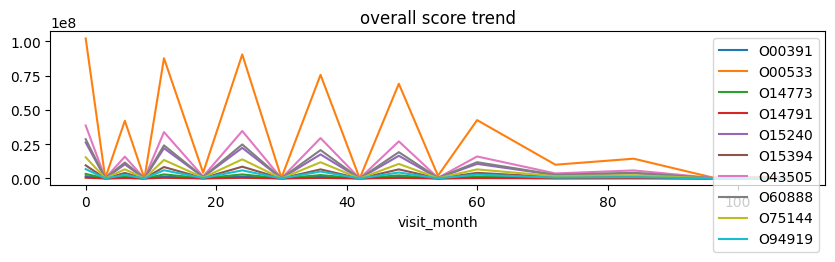

In [62]:
train[['visit_month', 'O00391', 'O00533', 'O14773', 'O14791', 'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O94919']].fillna(0).groupby('visit_month').sum().plot.line(figsize=(10, 2), title=f'overall score trend')

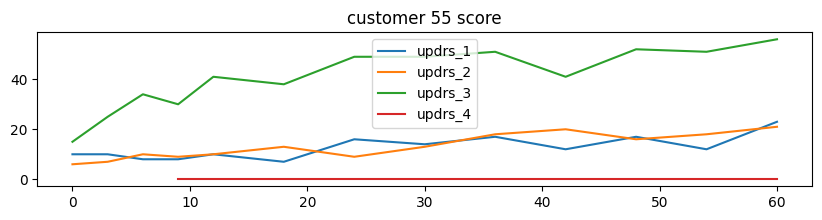

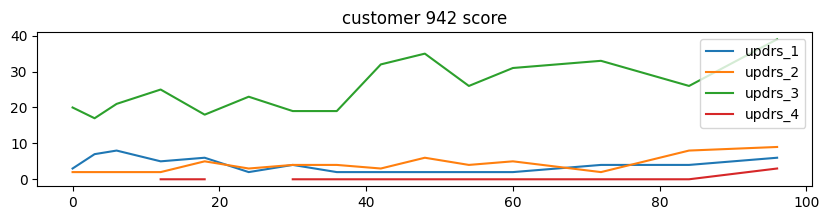

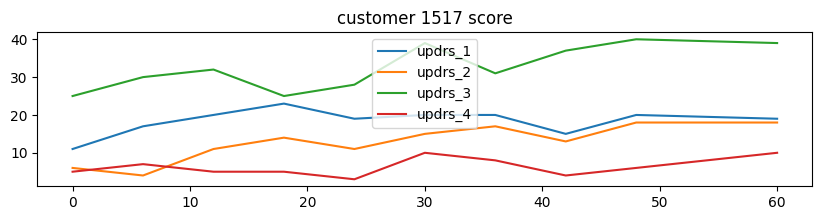

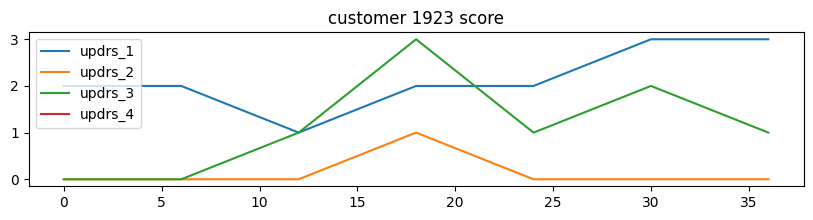

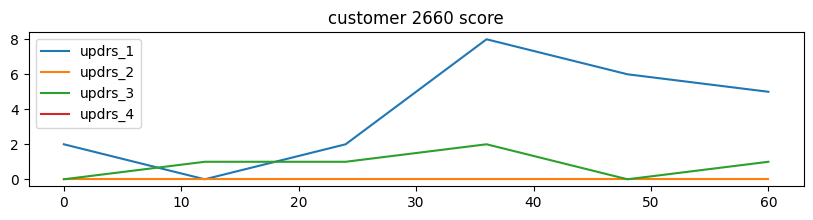

In [53]:
# plot scoring trend
for pid in train.patient_id.unique()[:5]:
    _t = train[train['patient_id'] == pid]
    updrs_1 = _t.updrs_1.values
    updrs_2 = _t.updrs_2.values
    updrs_3 = _t.updrs_3.values
    updrs_4 = _t.updrs_4.values
    
    df = pd.DataFrame({
        'updrs_1' : updrs_1,
        'updrs_2' : updrs_2,
        'updrs_3' : updrs_3,
        'updrs_4' : updrs_4
    }, index=_t.visit_month.values)
    
    df.plot.line(figsize=(10, 2), title=f'customer {pid} score')

### merge test files

In [64]:
%%time
# merge the test file as well
# aggreate by visit id, visit month, patient_id
test_proteins_agg = test_proteins_df.groupby(['visit_id'])['UniProt','NPX'].agg(list).reset_index()

# convert rows into columns - column name is the peptides name and value is peptide abundance
test_proteins_agg_col = pd.DataFrame()
for vid, UniProt, NPX in zip(test_proteins_agg['visit_id'], test_proteins_agg['UniProt'], test_proteins_agg['NPX']):
    data = {k:[v] for k,v in zip(UniProt, NPX)}
    data['visit_id'] = vid
    test_proteins_agg_col = pd.concat([test_proteins_agg_col, pd.DataFrame(data=data)])

CPU times: user 8.6 ms, sys: 74 µs, total: 8.68 ms
Wall time: 8.01 ms


<timed exec>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [65]:
test_proteins_agg_col

,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,O15031,P01033,P01594,P01833,P07333,P08133,P11277,Q13228,Q6UXD5,Q8NE71
0,14564.0,616804.0,61418.1,27830.1,14959.2,2853.12,223373.0,58863.0,207497.0,175485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,33127.9,490742.0,43615.3,NaN,16486.6,2882.42,124344.0,57688.1,200364.0,135168.0,...,11963.7,105886.0,8084.89,3969840.0,30788.5,50999.5,122650.0,5229.88,15938.2,14768.7


In [66]:
%%time
# aggreate by visit id, visit month, patient_id
test_petides_agg = test_petides_df.groupby(['visit_id'])['Peptide','PeptideAbundance'].agg(list).reset_index()

# convert rows into columns - column name is the peptides name and value is peptide abundance
test_petides_agg_col = pd.DataFrame()
for vid, peptides, peptideAbundance in zip(test_petides_agg['visit_id'], test_petides_agg['Peptide'], test_petides_agg['PeptideAbundance']):
    data = {k:[v] for k,v in zip(peptides, peptideAbundance)}
    data['visit_id'] = vid
    test_petides_agg_col = pd.concat([test_petides_agg_col, pd.DataFrame(data=data)])

CPU times: user 22.9 ms, sys: 369 µs, total: 23.3 ms
Wall time: 22.9 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [67]:
test_petides_agg_col

,NEQEQPLGQWHLS,GNPEPTFSWTK,IEIPSSVQQVPTIIK,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,SMEQNGPGLEYR,TLKIENVSYQDKGNYR,VIAVNEVGR,VMTPAVYAPYDVK,VNGSPVDNHPFAGDVVFPR,ELDLNSVLLK,...,SNVSDAVAQSTR,STSSFPC(UniMod_4)PAGHFNGFR,GAQTQTEEEMTR,NTGTEAPDYLATVDVDPK,QLGLPGPPDVPDHAAYHPFR,QGETLNFLEIGYSR,EGDMLTLFDGDGPSAR,FAALDNEEEDK,IC(UniMod_4)LEDNVLM(UniMod_35)SGVK,GNSYFMVEVK
0,14564.0,96318.4,182527.0,38422.5,34676.6,23912.7,118183.0,63784.8,58979.7,28460.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10901.6,51499.4,125492.0,23174.2,20918.8,16920.5,105806.0,107022.0,39908.5,17796.4,...,14379.8,50484.8,11051.1,5229.88,11012.6,25712.5,15938.2,14768.7,14798.6,46049.4


In [69]:
# merge data
# merge clinical with protein
test = pd.merge(test_clinical_df, test_proteins_agg_col, on=['visit_id'], how='left')
# merge with peptides
test = pd.merge(test, test_petides_agg_col, on=['visit_id'], how='left')

test.head(3)

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key,O00391,O00533,O00584,O14498,...,SNVSDAVAQSTR,STSSFPC(UniMod_4)PAGHFNGFR,GAQTQTEEEMTR,NTGTEAPDYLATVDVDPK,QLGLPGPPDVPDHAAYHPFR,QGETLNFLEIGYSR,EGDMLTLFDGDGPSAR,FAALDNEEEDK,IC(UniMod_4)LEDNVLM(UniMod_35)SGVK,GNSYFMVEVK
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
train.head(3)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,VSEADIQR,NSWGEEWGMGGYVK,SSNTYTLTDVRR,EPQVYTLPPSRDELTK
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,23122.5,283103.0,10698.4,11808.5,27229.3,NaN,8667.28,8833.09,13929.2,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,23499.8,89583.1,NaN,10336.0,23305.4,50231.1,7170.32,9106.86,15427.3,NaN


In [82]:
labels = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

columns_only_in_test = list(set(test.columns).difference(set(train.columns)))
columns_only_in_train = list(set(train.columns).difference(set(test.columns)))

# align the columns between train and test
train_ = train.drop(columns=[c for c in columns_only_in_train if c not in labels])
test_ = test.drop(columns=columns_only_in_test)

In [83]:
train_.head(3)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,O00391,O00533,O14773,...,TSTDLQVLAAR,EAEEHQETQC(UniMod_4)LR,NVDGVNYASITR,ELDESLQVAER,AQC(UniMod_4)GGGLLGVR,GAQTQTEEEMTR,ELDLNSVLLK,PALEDLR,NSWGEEWGMGGYVK,SSNTYTLTDVRR
0,55_0,55,0,10.0,6.0,15.0,NaN,11254.3,732430.0,31238.0,...,13189.3,22021.6,23122.5,283103.0,10698.4,11808.5,27229.3,NaN,8833.09,13929.2
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,13163.6,630465.0,26219.9,...,12739.3,23109.0,23499.8,89583.1,NaN,10336.0,23305.4,50231.1,9106.86,15427.3


In [84]:
test_.head(3)

,visit_id,visit_month,patient_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,...,SGSAHEYSSSPDDAIFQSLAR,FLPSYQAVEYMR,EAEEETTNDNGVLVLEPARK,SNVSDAVAQSTR,STSSFPC(UniMod_4)PAGHFNGFR,GAQTQTEEEMTR,EGDMLTLFDGDGPSAR,FAALDNEEEDK,IC(UniMod_4)LEDNVLM(UniMod_35)SGVK,GNSYFMVEVK
0,3342_0,0,3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3342_0,0,3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3342_0,0,3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
%%time
# save to local disk
train_.to_parquet('./data/train.pgt')
test_.to_parquet('./data/test.pgt')

CPU times: user 347 ms, sys: 55.9 ms, total: 403 ms
Wall time: 789 ms
